In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
### Importing the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import SMOTE

In [0]:
final_df=pd.read_csv('/content/drive/My Drive/Hotstar_final.csv')

In [5]:
final_df.head()

,Unnamed: 0,Train_ID,cities,segment,lund,mulund west,bhiwandi,nottingham,kathmandu,santa clara,sungai petani,herouville-saint-clair,navsari,kottayam,surbiton,paderborn,harbin,nagpur,camden,takapuna,pescara,jiddah,kunming,yiwu,barueri,altstadt-lehel,campulung,prabhadevi,dhaka,savona,luxembourg,friedrichshain,galle,dandenong,tirupati,nizhniy novgorod,kyiv,bhandup west,leicester,sao paulo,...,Fri,Sun,genres,Family,Travel,Romance,Athletics,Teen,Kids,Cricket,Crime,Drama,Table Tennis,LiveTV,Tennis,Football,Reality,Documentary,Kabaddi,Formula1,Swimming,Awards,Boxing,Science,Thriller,Volleyball,IndiaVsSa,FormulaE,Sport,Horror,Hockey,TalkShow,Wildlife,Badminton,Comedy,Mythology,Action,Genres_Times,Day_Times,Avg_Time
0,0,train-121672,"delhi:3492,mumbai:64",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,"Drama:6,Cricket:3469,Wildlife:79",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3554,3554,3554
1,1,train-121673,"ahmedabad:56666,mumbai:26989",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,"Drama:48949,Family:9927,Crime:1901,Romance:165...",1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,83637,83639,83643
2,2,train-121670,navi mumbai:29400,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,29398,29396,29398
3,3,train-121671,"chennai:77,navi mumbai:4005,mumbai:0",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,"Romance:77,Drama:122,Cricket:3883",0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4082,4082,4082
4,4,train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,TalkShow:8529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8529,8528,8528


In [0]:
## Creating function necessary for model building
def report(model,xtrain,xtest,ytrain,ytest):
  model.fit(xtrain,ytrain)
  pred=model.predict(xtest)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest))

def Models(xtrain,xtest,ytrain,ytest):
  model=LogisticRegression()
  print('--------------------------------   LOGISTIC REGRESSION   ----------------------------')
  model.fit(xtrain,ytrain)
  pred=model.predict(xtest)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest))


  print('--------------------------------   DECISIONTREE CLASSIFIER   ----------------------------')
  model=DecisionTreeClassifier(max_depth=10,criterion='gini')
  model.fit(xtrain,ytrain)
  pred=model.predict(xtest)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest)) 
  

  print('--------------------------------   KNN   ----------------------------')
  model=KNeighborsClassifier(n_neighbors=7)
  model.fit(xtrain,ytrain)
  pred=model.predict(xtest)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest))


  print('--------------------------------   RANDOMFORESTCLASSIFIER   ----------------------------')
  model=RandomForestClassifier(max_depth=10,criterion='gini')
  model.fit(xtrain,ytrain)
  pred=model.predict(xtest)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest))


  print('--------------------------------   GRADIENT_BOOSTING_CLASSIFIER   ----------------------------')
  model=GradientBoostingClassifier()
  model.fit(xtrain,ytrain)
  pred=model.predict(xtest)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest))


In [48]:
### Train Test Split
x=final_df.drop(['Unnamed: 0','Train_ID','cities','genres','dow','segment'],axis=1)
y=final_df['segment']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
### Scaling the Data
sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)
xtest_sc=sc.transform(xtest)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


--------------------------------   LOGISTIC REGRESSION   ----------------------------
('Train Accuracy:', 0.11468571428571428)
('Test Accuracy:', 0.11258333333333333)
--------------------------------------   Confusion Matrix    --------------------------------
[[55374   130]
 [ 4419    77]]
-----------------------------    Classification Report     -----------------------------------
              precision    recall  f1-score   support

         neg       1.00      0.93      0.96     59793
         pos       0.02      0.37      0.03       207

   micro avg       0.92      0.92      0.92     60000
   macro avg       0.51      0.65      0.50     60000
weighted avg       0.99      0.92      0.96     60000



In [8]:
## Taking samples from data
ytest.value_counts()

neg    55504
pos     4496
Name: segment, dtype: int64

In [15]:
final_df.columns

Index([u'Unnamed: 0', u'Train_ID', u'cities', u'segment', u'lund',
       u'mulund west', u'bhiwandi', u'nottingham', u'kathmandu',
       u'santa clara',
       ...
       u'Hockey', u'TalkShow', u'Wildlife', u'Badminton', u'Comedy',
       u'Mythology', u'Action', u'Genres_Times', u'Day_Times', u'Avg_Time'],
      dtype='object', length=1408)

In [16]:
final_df.head()

,Unnamed: 0,Train_ID,cities,segment,lund,mulund west,bhiwandi,nottingham,kathmandu,santa clara,sungai petani,herouville-saint-clair,navsari,kottayam,surbiton,paderborn,harbin,nagpur,camden,takapuna,pescara,jiddah,kunming,yiwu,barueri,altstadt-lehel,campulung,prabhadevi,dhaka,savona,luxembourg,friedrichshain,galle,dandenong,tirupati,nizhniy novgorod,kyiv,bhandup west,leicester,sao paulo,...,Fri,Sun,genres,Family,Travel,Romance,Athletics,Teen,Kids,Cricket,Crime,Drama,Table Tennis,LiveTV,Tennis,Football,Reality,Documentary,Kabaddi,Formula1,Swimming,Awards,Boxing,Science,Thriller,Volleyball,IndiaVsSa,FormulaE,Sport,Horror,Hockey,TalkShow,Wildlife,Badminton,Comedy,Mythology,Action,Genres_Times,Day_Times,Avg_Time
0,0,train-121672,"delhi:3492,mumbai:64",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,"Drama:6,Cricket:3469,Wildlife:79",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3554,3554,3554
1,1,train-121673,"ahmedabad:56666,mumbai:26989",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,"Drama:48949,Family:9927,Crime:1901,Romance:165...",1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,83637,83639,83643
2,2,train-121670,navi mumbai:29400,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,29398,29396,29398
3,3,train-121671,"chennai:77,navi mumbai:4005,mumbai:0",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,"Romance:77,Drama:122,Cricket:3883",0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4082,4082,4082
4,4,train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,TalkShow:8529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8529,8528,8528


In [5]:
final_df.iloc[:,3:1361].head()

,segment,lund,mulund west,bhiwandi,nottingham,kathmandu,santa clara,sungai petani,herouville-saint-clair,navsari,kottayam,surbiton,paderborn,harbin,nagpur,camden,takapuna,pescara,jiddah,kunming,yiwu,barueri,altstadt-lehel,campulung,prabhadevi,dhaka,savona,luxembourg,friedrichshain,galle,dandenong,tirupati,nizhniy novgorod,kyiv,bhandup west,leicester,sao paulo,lucknow,san francisco,kuala pilah,...,sandton,allahabad,amritsar,koblenz,firozabad,al jizah,zahedan,jagdalpur,sri aman,surrey,ash shariqah,hoorn,semarang,strathfield,stokmarknes,laghouat,willemstad,thiagarajar college,montreal,tezpur,al qahirah,arezzo,nedumangad,panihati,tokyo,monmouth junction,cyberjaya,vilvoorde,dahod,cedar falls,westlinton,tremblay-en-france,sunnyvale,raman,barpeta,karlskrona,parel,raghogarh,jerusalem,appingedam
0,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,pos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
### EDA  for cities top 50

In [0]:
city=final_df.iloc[:,3:1361].apply(lambda x:x==1).sum()

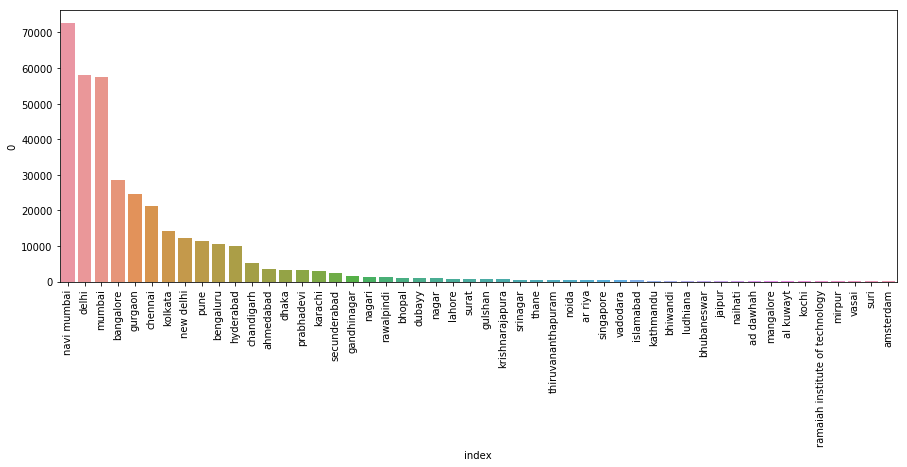

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
#city=pd.DataFrame(city).reset_index()
x=city.sort_values(by=0,ascending=False).head(50)
plt.figure(figsize=(15,5))
sns.barplot(x['index'],x[0])
plt.xticks(rotation=90)
plt.show()

In [0]:
### EDA  for days

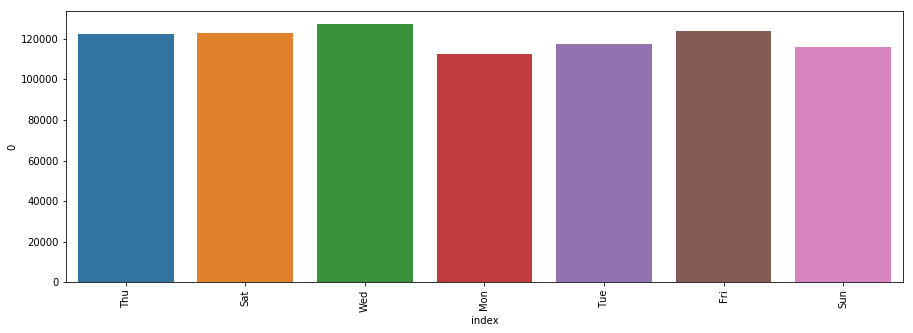

In [41]:
days=final_df.iloc[:,1363:1370].apply(lambda x:x==1).sum().reset_index()
#x=city.sort_values(by=0,ascending=False).head(50)
plt.figure(figsize=(15,5))
sns.barplot(days['index'],days[0])
plt.xticks(rotation=90)
plt.show()

In [0]:
### EDA  for genres

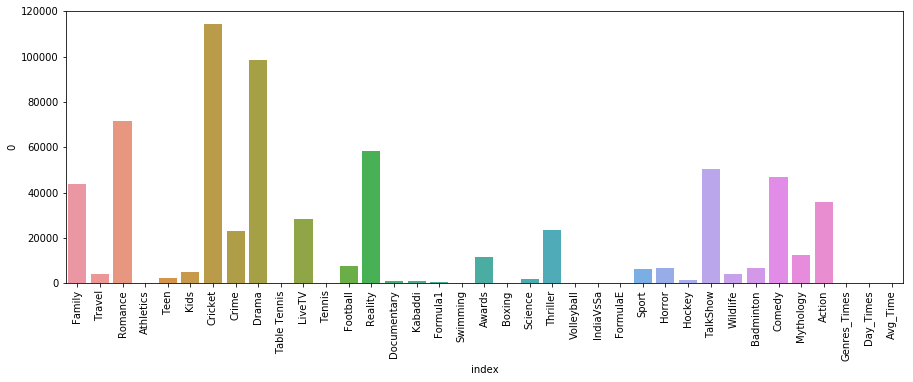

In [46]:
genres=final_df.iloc[:,1371:].apply(lambda x:x==1).sum().reset_index()
#x=city.sort_values(by=0,ascending=False).head(50)
plt.figure(figsize=(15,5))
sns.barplot(genres['index'],genres[0])
plt.xticks(rotation=90)
plt.show()

In [51]:
### First model logistic

#Models(xtrain_sc,xtest_sc,ytrain,ytest)
  model=LogisticRegression()
  print('--------------------------------   LOGISTIC REGRESSION   ----------------------------')
  model.fit(xtrain_sc,ytrain)
  pred=model.predict(xtest_sc)
  print('Train Accuracy:',model.score(xtrain,ytrain))
  print('Test Accuracy:',model.score(xtest,ytest))
  print('--------------------------------------   Confusion Matrix    --------------------------------')
  print(confusion_matrix(ytest,pred))
  print('-----------------------------    Classification Report     -----------------------------------')
  print(classification_report(pred,ytest))

--------------------------------   LOGISTIC REGRESSION   ----------------------------


KeyboardInterrupt: ignored

In [0]:
smt=SMOTE()
xtrain_sc,ytrain=smt.fit_sample(xtrain_sc,ytrain)